/tmp/ipykernel_6208/2620900379.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(dataset[column].mean(),inplace = True)


Best training accuracy: 1.0000 at k=1
Best validation accuracy: 0.8331 at k=9


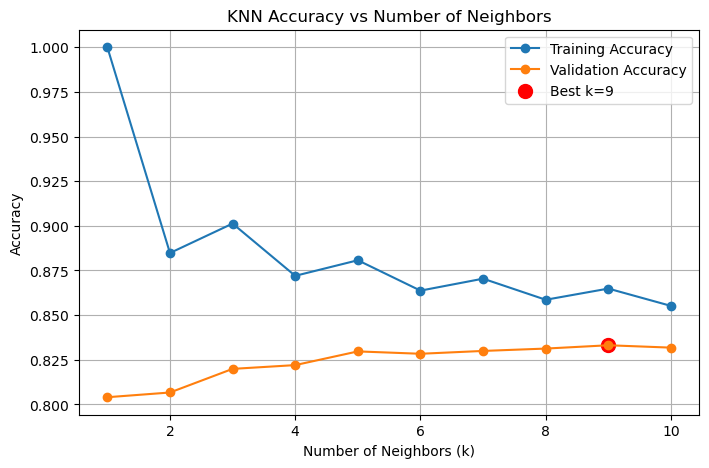

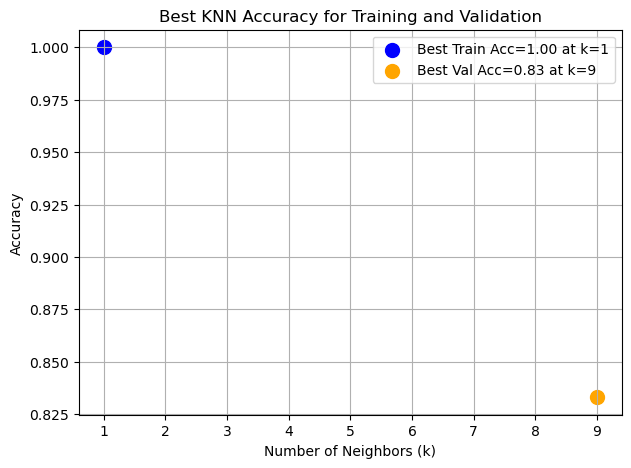

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
def check_duplicates(dataset):
        return dataset.drop_duplicates()
def check_missing_values(dataset):
        for column in dataset.columns :
                if(dataset[column].isnull().sum() > 0):
                        dataset[column].fillna(dataset[column].mean(),inplace = True)
        return dataset

def feature_transformatiom(dataset):
      # plot Box 
        # X = dataset.drop('class', axis=1).copy(deep=True)
        # first_quartile = X.quantile(0.25)
        # median = X.quantile(0.5)
        # third_quartile = X.quantile(0.75)
        # IQR = third_quartile - first_quartile
        # X = (X- median)/IQR
        # print(X)
      # log transform
                # transform = FunctionTransformer(np.log1p)
                # for column in dataset.drop('class',axis = 1).columns :
                #     dataset[column] = transform.fit_transform(dataset[[column]])
      # yeo_johnson transform
      
        # pt = PowerTransformer(method='yeo-johnson')
        # for column in dataset.drop('class',axis = 1).columns :
        #                 dataset_transformed = pt.fit_transform(dataset[[column]])
        #                 dataset[column] = pd.DataFrame(dataset_transformed, columns=[column])

      # Robust transform (value - median) / IQR
        for column in dataset.drop('class',axis = 1).columns :
                        
                        scaler  = RobustScaler()
                        dataset[column] = scaler.fit_transform(dataset[[column]])   ## learn and practise at the same time 
        # print(dataset)
        return dataset


def data_preprocessing(dataset_file):
        dataset = pd.read_csv(dataset_file)
        dataset.drop('Unnamed: 0',axis = 1,inplace = True)
                

        ## checking duplicates
        dataset = check_duplicates(dataset)


        ## checking missing values 
        dataset = check_missing_values(dataset)


        # Correlations
        # corr_features = dataset.drop("class", axis=1).corr()
        # print(corr_features)

        ## Feature tranformation 
        dataset = feature_transformatiom(dataset)

        return dataset

def knn_classifier(dataset):
        X = dataset.drop('class',axis = 1)
        y = dataset['class']
        training_data_X_full, test_data_X ,training_data_y_full, test_data_y = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
        training_data_X, validation_data_X ,training_data_y, validation_data_y = train_test_split(training_data_X_full,training_data_y_full,test_size=0.25,stratify=training_data_y_full,random_state=42)

        min_max_scalar = MinMaxScaler()
        min_max_scalar.fit(training_data_X)

        training_data_X = min_max_scalar.transform(training_data_X)
        validation_data_X = min_max_scalar.transform(validation_data_X)
        training_data_X_full = min_max_scalar.transform(training_data_X_full)
        test_data_X = min_max_scalar.transform(test_data_X)

        training_accuracy = []
        validation_accuracy= []
        k_neighbours = range(1,11)
        for k in k_neighbours :
                model = KNeighborsClassifier(n_neighbors=k)
                model.fit(training_data_X,training_data_y)
                training_accuracy.append(model.score(training_data_X,training_data_y))
                validation_accuracy.append(model.score(validation_data_X,validation_data_y))

        validation_accuracy = np.array(validation_accuracy)

        best_k_train = np.argmax(training_accuracy) + 1
        best_acc_train = training_accuracy[best_k_train - 1]

        best_k_val = np.argmax(validation_accuracy) + 1
        best_acc_val = validation_accuracy[best_k_val - 1]

        print(f"Best training accuracy: {best_acc_train:.4f} at k={best_k_train}")
        print(f"Best validation accuracy: {best_acc_val:.4f} at k={best_k_val}")

        plt.figure(figsize=(8,5))
        plt.plot(k_neighbours, training_accuracy, label="Training Accuracy", marker='o')
        plt.plot(k_neighbours, validation_accuracy, label="Validation Accuracy", marker='o')
        plt.scatter(best_k_val, validation_accuracy[best_k_val-1], color='red', label=f"Best k={best_k_val}", s=100)
        plt.xlabel("Number of Neighbors (k)")
        plt.ylabel("Accuracy")
        plt.title("KNN Accuracy vs Number of Neighbors")
        plt.legend()
        plt.grid(True)
        plt.show()
         # Plot only best points
        plt.figure(figsize=(7,5))
        plt.scatter(best_k_train, best_acc_train, color='blue', s=100, label=f"Best Train Acc={best_acc_train:.2f} at k={best_k_train}")
        plt.scatter(best_k_val, best_acc_val, color='orange', s=100, label=f"Best Val Acc={best_acc_val:.2f} at k={best_k_val}")
        plt.xlabel("Number of Neighbors (k)")
        plt.ylabel("Accuracy")
        plt.title("Best KNN Accuracy for Training and Validation")
        plt.legend()
        plt.grid(True)
        plt.show()


        final_test = KNeighborsClassifier(n_neighbors=best_k_val)
        model.fit(training_data_X_full,training_data_y_full)
        test_accuracy = model.score(test_data_X,test_data_y)
        plt.figure(figsize=(7,5))
        plt.scatter(best_k_val, test_accuracy, color='red', s=100, label=f"Best Train Acc={best_acc_train:.2f} at k={best_k_train}")
        plt.xlabel("Number of Neighbors (k)")
        plt.ylabel("Accuracy")
        plt.title("Best KNN Accuracy for Training and Validation")
        plt.legend()
        plt.grid(True)
        plt.show()



    


dataset = data_preprocessing("telescope_data.csv")
knn_classifier(dataset)

